<a href="https://colab.research.google.com/github/Simurgh818/BMED_6517_emotional_state_classifier/blob/main/DEAP_CNN_DataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.1: Clone repo and get dataset

In [2]:
# Importing the preprocessed dataset files
!wget https://drive.google.com/drive/folders/1_9n-kRKkpnCC2wVovOJsIXOyY3BeW1TB?usp=sharing

--2022-12-04 16:29:47--  https://drive.google.com/drive/folders/1_9n-kRKkpnCC2wVovOJsIXOyY3BeW1TB?usp=sharing
Resolving drive.google.com (drive.google.com)... 74.125.24.102, 74.125.24.100, 74.125.24.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.24.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘1_9n-kRKkpnCC2wVovOJsIXOyY3BeW1TB?usp=sharing’

1_9n-kRKkpnCC2wVovO     [  <=>               ] 221.04K   761KB/s    in 0.3s    

2022-12-04 16:29:47 (761 KB/s) - ‘1_9n-kRKkpnCC2wVovOJsIXOyY3BeW1TB?usp=sharing’ saved [226340]



In [1]:
#importing our git repo
import os
if not os.path.exists('/content/BMED_6517_emotional_state_classifier'):
  !wget https://github.com/Simurgh818/BMED_6517_emotional_state_classifier/blob/main/requirements.txt -q --show-progress --progress=dot
  !git clone https://github.com/Simurgh818/BMED_6517_emotional_state_classifier.git


     0K .......... .......... .......... .......... .......... 11.2M
    50K .......... .......... .......... .......... .......... 8.72M
   100K .......... .......... .......... .......... .......... 22.5M
   150K .......... .......... ..                               11.7M=0.01sCloning into 'BMED_6517_emotional_state_classifier'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 139 (delta 6), reused 12 (delta 1), pack-reused 114
Receiving objects: 100% (139/139), 78.37 MiB | 16.39 MiB/s, done.
Resolving deltas: 100% (50/50), done.


In [3]:
# import data from numpy arrays
import numpy as np

loaded_features = np.load('/content/BMED_6517_emotional_state_classifier/results/npy/EEG_features.npy', allow_pickle=True)

connectivityMatrix = loaded_features.item().get('connectivity_matrix')
connectivityLinear = loaded_features.item().get('connectivity_linear')
wavelet = loaded_features.item().get('waveletEntropy')
Valence = loaded_features.item().get('Valence')
Arousal = loaded_features.item().get('Arousal')
Classes = loaded_features.item().get('Classes')

print(connectivityMatrix.shape)
print(connectivityLinear.shape)
print(wavelet.shape)
print(Valence.shape)
print(Arousal.shape)
print(Classes.shape)

(880, 5, 32, 32)
(880, 5, 512)
(880, 32, 6)
(880,)
(880,)
(880,)


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf

# Importing Deep Learning Libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#from google.colab import files
#uploaded = files.upload()
#dataset_labels = np.load('content/gdrive/MyDrive/Colab Notebooks/Copy of labels_1_22.npy', mmap_mode='r')

In [7]:
#dataset_name1 = 'Copy of bipolar_feats.npy'

#dataset_bipolarfts = np.load(dataset_name1, encoding='bytes')

In [8]:
#dataset_name2 = 'Copy of labels_1_22.npy'

#dataset_labels = np.load(dataset_name2, encoding='bytes')

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_iris

In [10]:
print(np.shape(Classes))
print(np.unique(Classes))

(880,)
[0. 1. 2. 3.]


### 1.2: class balancing

In [11]:
# Class balance check:
labels = ['Classes']
zeros = [Classes[Classes == 0].shape[0]]
ones = [Classes[Classes == 1].shape[0]]
twos = [Classes[Classes == 2].shape[0]]
threes = [Classes[Classes == 3].shape[0]]

x = np.arange(1)  # the label locations
width = 0.25  # the width of the bars

print(ones)

[172]


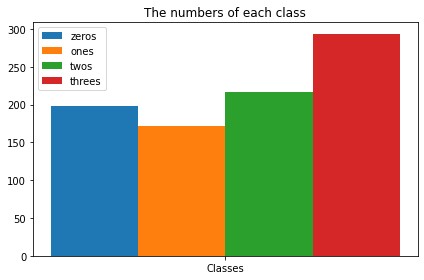

In [12]:
fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, zeros, width, label='zeros')
rects2 = ax.bar(x - width/2, ones, width, label='ones')
rects3 = ax.bar(x + width/2, twos, width, label='twos')
rects4 = ax.bar(x + 1.5*width, threes, width, label='threes')

ax.set_title('The numbers of each class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

In [64]:
# Rebalance classes based on class 1 = 172: Take the first 172 from class 0,2 and 3.
zero_mask = (Classes == 0)
one_mask = (Classes == 1)
two_mask = (Classes == 2)
three_mask = (Classes == 3)
size = 172

Classes_bl = np.concatenate([Classes[zero_mask][:size],Classes[one_mask][:size],
                            Classes[two_mask][:size],Classes[three_mask][:size]])
print(np.shape(Classes_bl),'\n 128*4 is: ', 128*4)

connectivityMatrix_bl = np.concatenate([connectivityMatrix[zero_mask][:size],connectivityMatrix[one_mask][:size],
                            connectivityMatrix[two_mask][:size],connectivityMatrix[three_mask][:size]])
print(np.shape(connectivityMatrix_bl))

(688,) 
 128*4 is:  512
(688, 5, 32, 32)


In [65]:
print(Classes_bl[Classes_bl == 0].shape[0])

172


In [66]:
# balancing valence and arrousal
Valence_bl = np.concatenate([Valence[zero_mask][:size],Valence[one_mask][:size],
                            Valence[two_mask][:size],Valence[three_mask][:size]])
print('Valence shape is: ', np.shape(Valence_bl))

Arousal_bl = np.concatenate([Arousal[zero_mask][:size],Arousal[one_mask][:size],
                            Arousal[two_mask][:size],Arousal[three_mask][:size]])
print('Arousal shape is: ', np.shape(Arousal_bl))

Valence shape is:  (688,)
Arousal shape is:  (688,)


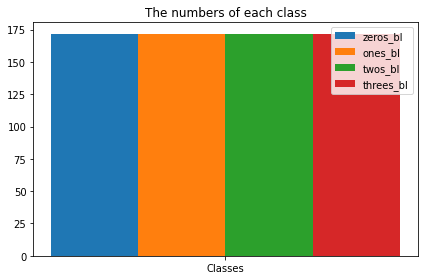

In [67]:
zeros_bl = [Classes_bl[Classes_bl == 0].shape[0]]
ones_bl = [Classes_bl[Classes_bl == 1].shape[0]]
twos_bl = [Classes_bl[Classes_bl == 2].shape[0]]
threes_bl = [Classes_bl[Classes_bl == 3].shape[0]]
x = np.arange(1)  # the label locations
fig2, ax2 = plt.subplots()
rects1 = ax2.bar(x - 1.5*width, zeros_bl, width, label='zeros_bl')
rects2 = ax2.bar(x - width/2, ones_bl, width, label='ones_bl')
rects3 = ax2.bar(x + width/2, twos_bl, width, label='twos_bl')
rects4 = ax2.bar(x + 1.5*width, threes_bl, width, label='threes_bl')

ax2.set_title('The numbers of each class')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()

fig2.tight_layout()

### 1.3: CNN Model

In [69]:
# Algorithm 1 for Convolutional Neural Model :
##Require: Training EEG Dataset nntrX, Training Valence/Arousal Values nntrY, Testing subject’s EEG
#Dataset nnteX, Testing Valence/Arousal Values nnteY
# cnn = model(trainX, trainY )

#x = dataset_bipolarfts
x = connectivityMatrix_bl
#y = dataset_labels[1:881]
y = np.vstack([Valence_bl,Arousal_bl]).T
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
y[np.where(y<4.5)] = 0
y[np.where(y>=4.5)] = 1
y_4_class = y[:,0]*2+y[:,1]
print(np.unique(y_4_class))
print(y_4_class.shape)
y_one_hot = np.zeros((y.shape[0],4))
y_one_hot[np.where(y_4_class==0),0] = 1
y_one_hot[np.where(y_4_class==1),1] = 1
y_one_hot[np.where(y_4_class==2),2] = 1
y_one_hot[np.where(y_4_class==3),3] = 1
print(np.unique(y_one_hot))
print(y_one_hot.shape)
print(np.sum(y_one_hot,axis=0))

[0. 1. 2. 3.]
(688,)
[0. 1.]
(688, 4)
[116. 164. 176. 232.]


In [117]:
val_size = 4
y_test = y_one_hot[:val_size*40,:]
x_test = x[:val_size*40,:,:,:]
y_train = y_one_hot[val_size*40:,:]
x_train = x[val_size*40:,:,:,:]
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)

(160, 5, 32, 32)
(528, 5, 32, 32)
(528, 4)


In [118]:
import keras
from keras import optimizers
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Activation, concatenate
from keras.callbacks import ModelCheckpoint
from keras.metrics import CategoricalAccuracy,CategoricalCrossentropy,Precision,Recall

In [119]:
from keras.layers.activation.relu import ReLU
def make_CNN_layers(input_mat):
  # layer 1
  model = Conv2D(16,(3,3),padding='same',input_shape=input_shape)(input_mat)
  model = ReLU()(model)
  model = MaxPooling2D((2,2),padding='same')(model)
  model = Dropout(0.2)(model)

  # layer 2
  model = Conv2D(32,(3,3),padding='same')(model)
  model = ReLU()(model)
  model = MaxPooling2D((2,2),padding='same')(model)
  model = Dropout(0.2)(model)

  #layer 3
  model = Conv2D(64,(3,3),padding='same')(model)
  model = ReLU()(model)
  model = MaxPooling2D((2,2),padding='same')(model)
  model = Dropout(0.5)(model)

  return model

In [120]:
input_shape = x_test[0,0].shape
input_shape = (32,32,1)
delta_input = Input(shape = input_shape)
delta_model = make_CNN_layers(delta_input)

theta_input = Input(shape = input_shape)
theta_model = make_CNN_layers(theta_input)

alpha_input = Input(shape = input_shape)
alpha_model = make_CNN_layers(alpha_input)

beta_input = Input(shape = input_shape)
beta_model = make_CNN_layers(beta_input)

gamma_input = Input(shape = input_shape)
gamma_model = make_CNN_layers(gamma_input)

conv = concatenate([delta_model,theta_model,alpha_model,beta_model,gamma_model])

conv = Flatten()(conv)

dense = Dense(512)(conv)
dense = ReLU()(dense)
dense = Dropout(0.3)(dense)

output = Dense(4,activation='softmax')(dense)

model = Model(inputs=[delta_input,theta_input,alpha_input,beta_input,gamma_input],
              outputs=[output])

opt = optimizers.SGD(learning_rate=1e-2, momentum=0)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['acc',Recall(),Precision()])

In [121]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_26 (InputLayer)          [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 input_27 (InputLayer)          [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 input_28 (InputLayer)          [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 input_29 (InputLayer)          [(None, 32, 32, 1)]  0           []                               
                                                                                            

In [122]:
x_delta = x_train[:,0,:,:]
x_theta = x_train[:,1,:,:]
x_alpha = x_train[:,2,:,:]
x_beta = x_train[:,3,:,:]
x_gamma = x_train[:,4,:,:]
validation_data=([x_delta[:40],x_theta[:40],x_alpha[:40],x_beta[:40],x_gamma[:40]],y_train[:40])

#### 1.3.1: Data Augmentation

In [123]:
# Data Augmentation


In [124]:
# Data augmentation: cropping
x_delta = x_train[:,0,:,:]
print(np.shape(x_delta))
rnd_idx = int(np.round(np.random.rand(1)*100)[0])
print(rnd_idx)
x_delta_clip = x_train[rnd_idx:rnd_idx+100,0,:,:]
print(np.shape(x_delta_clip))
x_delta_aug = np.append(x_delta,x_delta_clip, axis=0)
print(np.shape(x_delta_aug))

x_theta = x_train[:,1,:,:]
x_theta_clip = x_train[rnd_idx:rnd_idx+100,1,:,:]
x_theta_aug = np.append(x_theta,x_theta_clip, axis=0)

x_alpha = x_train[:,2,:,:]
x_alpha_clip = x_train[rnd_idx:rnd_idx+100,2,:,:]
x_alpha_aug = np.append(x_alpha,x_alpha_clip, axis=0)

x_beta = x_train[:,3,:,:]
x_beta_clip = x_train[rnd_idx:rnd_idx+100,3,:,:]
x_beta_aug = np.append(x_beta,x_beta_clip, axis=0)

x_gamma = x_train[:,4,:,:]
x_gamma_clip = x_train[rnd_idx:rnd_idx+100,4,:,:]
x_gamma_aug = np.append(x_gamma,x_gamma_clip, axis=0)

y_clip = y_train[rnd_idx:rnd_idx+100]
y_train_aug = np.append(y_train,y_clip, axis=0)
print(np.shape(y_train_aug),'\n', y_train_aug[-1,:])

(528, 32, 32)
14
(100, 32, 32)
(628, 32, 32)
(628, 4) 
 [0. 0. 1. 0.]


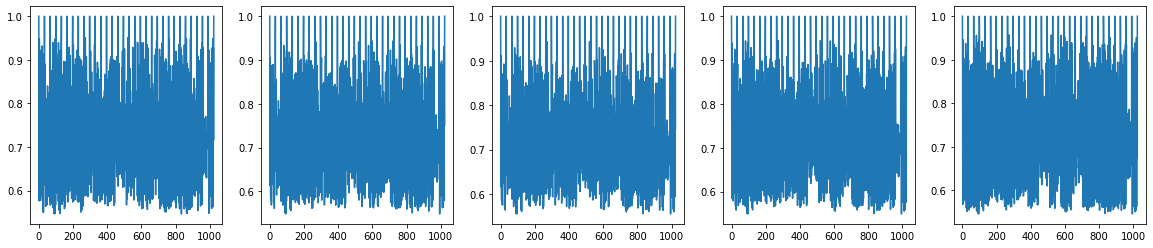

In [125]:
plt.figure(figsize=(20,4))
x_plt = np.arange(0,32*32)
plt.subplot(1,5,1)
plt.plot(x_plt, x_delta_aug[0,:,:].ravel());
plt.subplot(1,5,2)
plt.plot(x_plt, x_theta_aug[0,:,:].ravel());
plt.subplot(1,5,3)
plt.plot(x_plt, x_alpha_aug[0,:,:].ravel());
plt.subplot(1,5,4)
plt.plot(x_plt, x_beta_aug[0,:,:].ravel());
plt.subplot(1,5,5)
plt.plot(x_plt, x_gamma_aug[0,:,:].ravel());

(528, 32, 32)
83
(100, 32, 32)
(100, 32, 32)
(728, 32, 32)
(728, 4)


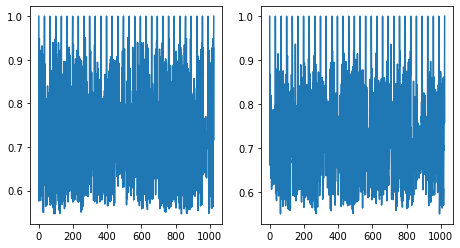

In [129]:
# adding flipping augmentation

x_delta = x_train[:,0,:,:]
print(np.shape(x_delta))
rnd_idx2 = int(np.round(np.random.rand(1)*100)[0])
print(rnd_idx2)
x_delta_clip2 = x_train[rnd_idx2:rnd_idx2+100,0,:,:]
print(np.shape(x_delta_clip2))
x_theta_clip2 = x_train[rnd_idx2:rnd_idx2+100,1,:,:]
x_alpha_clip2 = x_train[rnd_idx2:rnd_idx2+100,2,:,:]
x_beta_clip2 = x_train[rnd_idx2:rnd_idx2+100,3,:,:]
x_gamma_clip2 = x_train[rnd_idx2:rnd_idx2+100,4,:,:]

x_size = np.shape(x_delta_clip2)[0]
x_delta_flip = np.empty((x_size, 32,32))
x_theta_flip = np.empty((x_size, 32,32))
x_alpha_flip = np.empty((x_size, 32,32))
x_beta_flip = np.empty((x_size, 32,32))
x_gamma_flip = np.empty((x_size, 32,32))

for f in range(0, x_size):
  x_delta_fl = np.flip(x_delta_clip2[f,:,:].ravel())
  x_delta_flip[f,:,:] = np.reshape(x_delta_fl, (32,32))

  x_theta_fl = np.flip(x_theta_clip2[f,:,:].ravel())
  x_theta_flip[f,:,:] = np.reshape(x_theta_fl, (32,32))

  x_alpha_fl = np.flip(x_alpha_clip2[f,:,:].ravel())
  x_alpha_flip[f,:,:] = np.reshape(x_alpha_fl, (32,32))

  x_beta_fl = np.flip(x_beta_clip2[f,:,:].ravel())
  x_beta_flip[f,:,:] = np.reshape(x_beta_fl, (32,32))

  x_gamma_fl = np.flip(x_gamma_clip2[f,:,:].ravel())
  x_gamma_flip[f,:,:] = np.reshape(x_gamma_fl, (32,32))

print(np.shape(x_delta_flip))

plt.figure(figsize=(20,4))
x_plt = np.arange(0,32*32)
plt.subplot(1,5,1)
plt.plot(x_plt, x_delta_aug[0,:,:].ravel());
plt.subplot(1,5,2)
plt.plot(x_plt, x_delta_flip[0,:,:].ravel());

x_delta_aug2 = np.append(x_delta_aug,x_delta_flip, axis=0)
print(np.shape(x_delta_aug2))
x_theta_aug2 = np.append(x_theta_aug,x_theta_flip, axis=0)
x_alpha_aug2 = np.append(x_alpha_aug,x_alpha_flip, axis=0)
x_beta_aug2 = np.append(x_beta_aug,x_beta_flip, axis=0)
x_gamma_aug2 = np.append(x_gamma_aug,x_gamma_flip, axis=0)

y_clip2 = y_train[rnd_idx2:rnd_idx2+100]

y_train_aug2 = np.append(y_train_aug,y_clip2, axis=0)
print(np.shape(y_train_aug2))

In [130]:
best_weights_file = 'weights.best.hdf5'
checkpoint = ModelCheckpoint(best_weights_file,monitor='val_loss',verbose=1,
                             save_best_only=True,mode='min')

callbacks = [checkpoint]


train_history = model.fit([x_delta_aug2[40:],x_theta_aug2[40:],x_alpha_aug2[40:],
                           x_beta_aug2[40:],x_gamma_aug2[40:]],y_train_aug2[40:],
                          batch_size=16,epochs=500,callbacks=callbacks,
                          validation_data=validation_data,shuffle=True)

Epoch 1/500
39/43 [==========================>...] - ETA: 0s - loss: 1.1569 - acc: 0.3894 - recall_5: 0.0705 - precision_5: 0.4272
Epoch 1: val_loss improved from inf to 1.32595, saving model to weights.best.hdf5
43/43 [==============================] - 2s 24ms/step - loss: 1.1541 - acc: 0.3895 - recall_5: 0.0727 - precision_5: 0.4274 - val_loss: 1.3259 - val_acc: 0.7250 - val_recall_5: 0.0000e+00 - val_precision_5: 0.0000e+00
Epoch 2/500
40/43 [==========================>...] - ETA: 0s - loss: 1.1133 - acc: 0.3828 - recall_5: 0.1031 - precision_5: 0.3860
Epoch 2: val_loss did not improve from 1.32595
43/43 [==============================] - 0s 11ms/step - loss: 1.1137 - acc: 0.3823 - recall_5: 0.1032 - precision_5: 0.3923 - val_loss: 1.3482 - val_acc: 0.7250 - val_recall_5: 0.0000e+00 - val_precision_5: 0.0000e+00
Epoch 3/500
43/43 [==============================] - ETA: 0s - loss: 1.1055 - acc: 0.4012 - recall_5: 0.0887 - precision_5: 0.4122
Epoch 3: val_loss improved from 1.32595 to

In [131]:
num_epochs = train_history.epoch[-1]+1
history = train_history.history

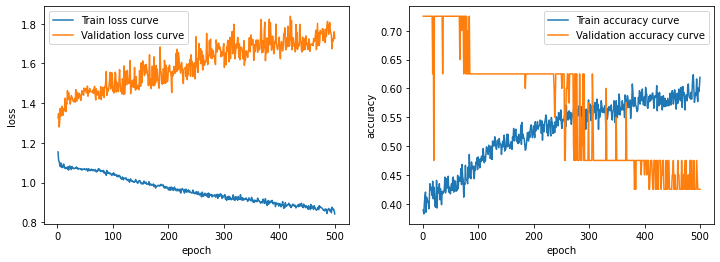

In [132]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].plot(range(1, num_epochs+1), history['loss'])
axes[0].plot(range(1, num_epochs+1), history['val_loss'])
axes[0].legend(['Train loss curve', 'Validation loss curve'])
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')


axes[1].plot(range(1, num_epochs+1), history['acc'])
axes[1].plot(range(1, num_epochs+1), history['val_acc'])
axes[1].legend(['Train accuracy curve', 'Validation accuracy curve'])
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('accuracy')
plt.show()

In [133]:
# early stopping
early_stop_epoch = np.argmax(history['val_acc'])
print('The early stop epoch is: ', early_stop_epoch)
print('Train acc (Early stopping): %.2f' % history['acc'][early_stop_epoch])
print('Validation acc (Early stopping): %.2f' % history['val_acc'][early_stop_epoch])

The early stop epoch is:  0
Train acc (Early stopping): 0.39
Validation acc (Early stopping): 0.73
